# Medical Cost Prediction

### Problem Statement

In the health insurance industry, insurance companies often face challenges in determining accurate premiums for each policyholder. Errors in assessing health risks can result in significant financial losses. Therefore, accurate health insurance premium determination is crucial to maintain financial stability for insurance companies and provide fair services to policyholders.

In this project, we will use a dataset containing information about health insurance policyholders, including age, gender, Body Mass Index (BMI), number of children, smoking habits, residential region, and individual medical charges billed by insurance. This dataset serves as a valuable data source to develop predictive models that can assist health insurance companies in assessing risks and determining more accurate insurance premiums.

<img src = 'https://akm-img-a-in.tosshub.com/indiatoday/images/story/202204/insurance-7065113_1920_1200x768.png?VersionId=3A0sGCxdR8o36_z8Do9HLrHXBHUtYAJY&size=690:388'>

The aim of this analysis is to predict the medical expense based on the patients'information. The dataset used for this analysis is Insurance dataset from [Kaggle](https://www.kaggle.com/mirichoi0218/insurance). The dataset contains 1338 observations and 7 variables. The variables are as follows:


### Information about Dataset

| Variable | Description |
| --- | --- |
| age | age of primary beneficiary |
|bmi | body mass index |
|children | number of children covered by health insurance |
|smoker | smoking |
|region | the beneficiary's residential area in the US |
|charges | individual medical costs billed by health insurance |

<h2 style="color:blue" align="left"> 1. Import necessary Libraries </h2>

In [1]:
# Read Data
import numpy as np                     # For doing Numerical caluculation like mean, std, mode etc.,
import pandas as pd                    # for loading, reading and manipulation the data

# Visualization
import seaborn as sns                  # Visualization using seaborn
import matplotlib.pyplot as plt        # Visualization using matplotlib

import warnings                        # Ignore Warnings
warnings.filterwarnings("ignore")

<h2 style="color:blue" align="left"> 2. Loading dataset </h2>

In [2]:
df = pd.read_csv('insurance.csv')
print(f'First 5 rows {df.head()}')

First 5 rows    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
# checking dimension (num of rows and columns) of dataset
print("data shape (Rows, Columns):",df.shape)

data shape (Rows, Columns): (1338, 7)


In [4]:
#Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<h2 style="color:blue" align="left"> 3. EDA (Exploratory Data Analysis) </h2>

- EDA is a way of **Visualizing, Summarizing and interpreting** the information that is **hidden in rows and column** format.

<b> Find Unwanted Columns </b>

Currently there are no any unwanted columns in the dataset

<b> Find Missing Values </b>

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No missing values in the dataset

<b> Explore categorical Features </b>

In [6]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']
categorical_features

['sex', 'smoker', 'region']

<b> Checking for unique values in Categorical_features </b>

In [7]:
print(df['sex'].unique())
print(df['smoker'].unique())
print(df['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [8]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'object']
numerical_features

['age', 'bmi', 'children', 'charges']

<b> Find Outliers in numerical features </b>

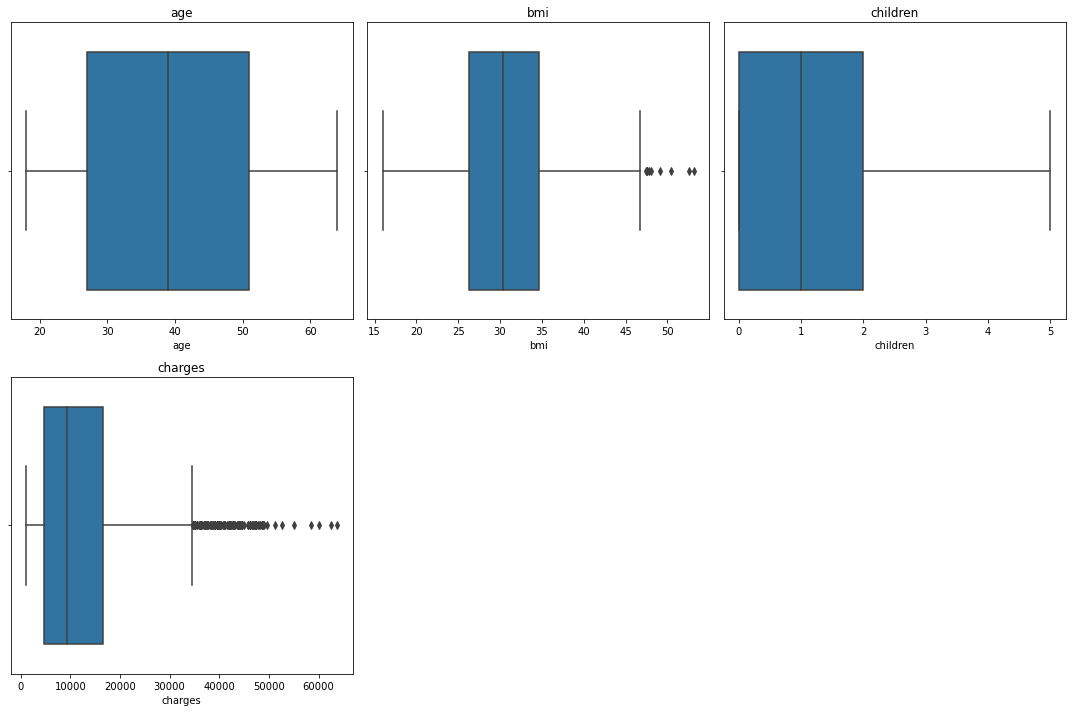

In [9]:
# Get the names of all columns with data type 'int'
num_vars = [feature for feature in numerical_features]

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn
for i, var in enumerate(num_vars):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

<h2 style="color:blue" align="left"> 4. Descriptive Statistics  </h2>

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


<h2 style="color:blue" align="left"> 5. Data Visualization </h2>

### 1. Univariate Analysis

- Univariate Analysis : data consists of **only one variable (only x value)**.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Age

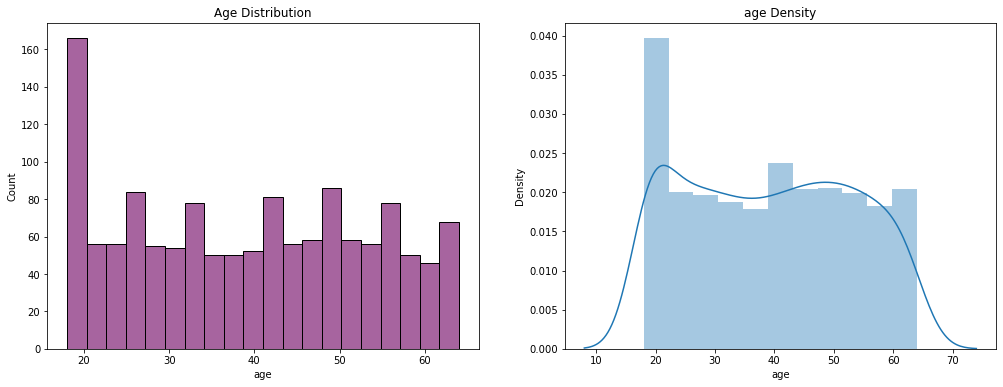

In [13]:
f,ax = plt.subplots(1,2, figsize=(17,6))

sns.histplot(df['age'],bins=20,kde=False,color='#8A307F',ax=ax[0])
ax[0].set_title('Age Distribution')

sns.distplot(df['age'],kde=True,ax=ax[1])
ax[1].set_title('age Density')

plt.show()

### Sex

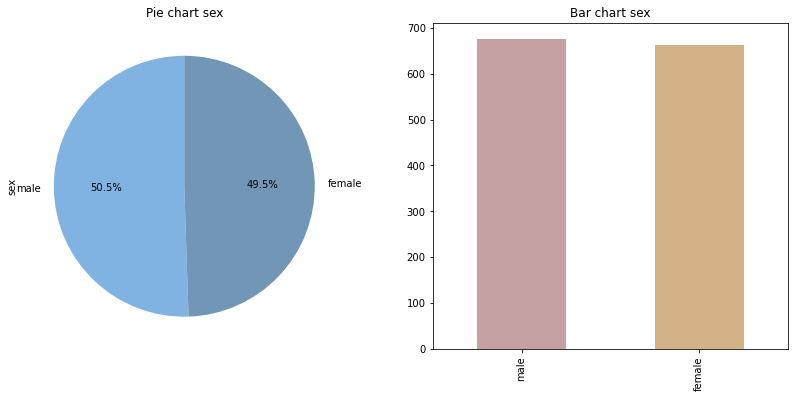

In [14]:
f,ax = plt.subplots(1,2,figsize=(14,6))

df['sex'].value_counts().plot(kind='pie',autopct='%4.1f%%',colors = ['#80B3E1', '#7296B6', '#3D85C6'], startangle=90,ax=ax[0])
ax[0].set_title('Pie chart sex')

df['sex'].value_counts().plot.bar(color=['#c5a1a1', '#d4b288', '#d6c875','#a8c17f'], ax=ax[1])
ax[1].set_title('Bar chart sex')

plt.show()

### bmi

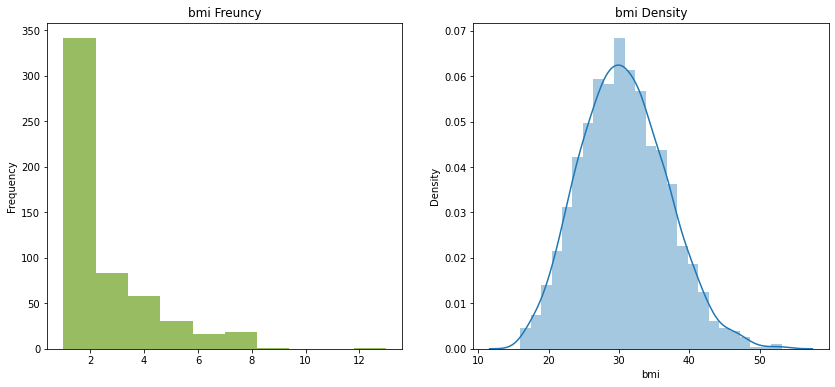

In [15]:
f,ax = plt.subplots(1,2, figsize=(14,6))

df['bmi'].value_counts().plot(kind='hist',ax=ax[0],bins=10, color='#97BC62')
ax[0].set_title('bmi Freuncy')

sns.distplot(df['bmi'],ax=ax[1])
ax[1].set_title('bmi Density')

plt.show()

###  children

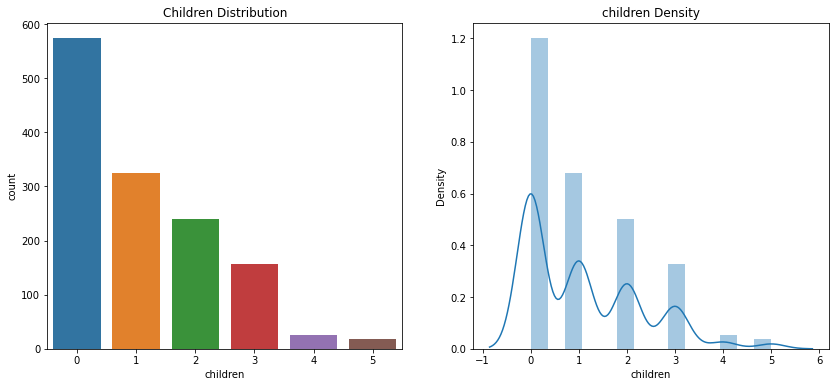

In [16]:
f,ax = plt.subplots(1,2, figsize=(14,6))

sns.countplot(x = 'children', data = df,ax=ax[0])
ax[0].set_title('Children Distribution')

sns.distplot(df['children'],kde=True,ax=ax[1])
ax[1].set_title('children Density')

plt.show()

### smoker

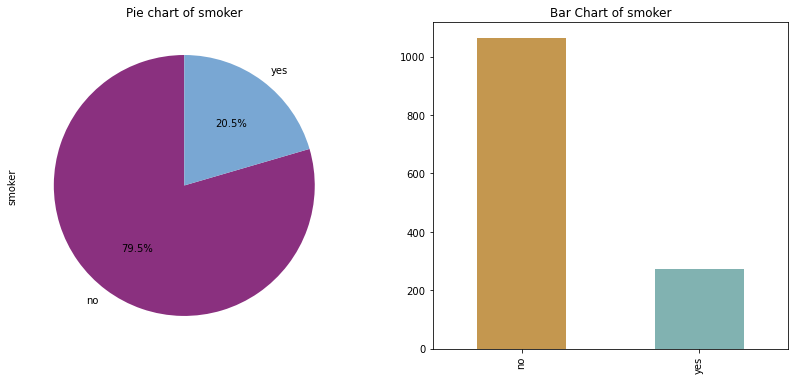

In [17]:
f,ax = plt.subplots(1,2,figsize=(14,6))

df['smoker'].value_counts().plot(kind='pie',autopct='%4.1f%%',colors = ['#8A307F','#79A7D3', '#6883BC'],startangle=90,ax=ax[0])
ax[0].set_title('Pie chart of smoker')

df['smoker'].value_counts().plot.bar(color=['#C4974F', '#81B2B1'], ax=ax[1])
ax[1].set_title('Bar Chart of smoker')

plt.show()

### region

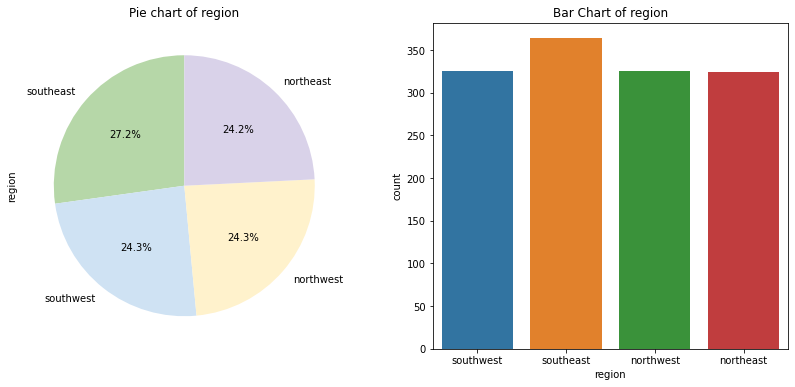

In [18]:
f,ax = plt.subplots(1,2,figsize=(14,6))

df['region'].value_counts().plot(kind='pie',autopct='%4.1f%%',colors = ['#b6d7a8','#cfe2f3','#fff2cc','#d9d2e9'], startangle=90,ax=ax[0])
ax[0].set_title('Pie chart of region')

sns.countplot(x=df['region'] , ax=ax[1])
ax[1].set_title('Bar Chart of region')

plt.show()

### charges

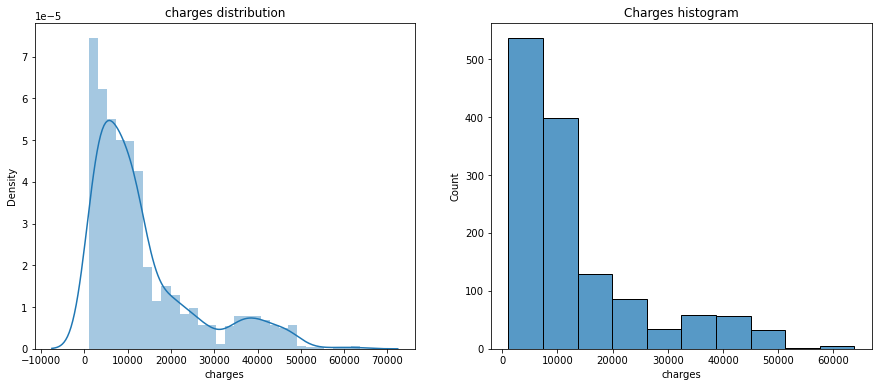

In [19]:
f,ax = plt.subplots(1,2,figsize=(15,6))

sns.distplot(df['charges'],ax=ax[0])
ax[0].set_title('charges distribution')

sns.histplot(df['charges'], bins=10, kde= False,ax=ax[1])
ax[1].set_title('Charges histogram')

plt.show()

### 2. Bivariate Analysis

- **Bivariate Analysis** : data involves **two different variables**.

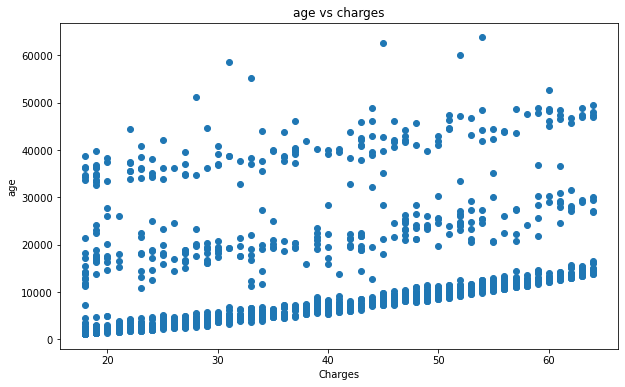

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(x='age',y='charges',data=df)
plt.xlabel('Charges')
plt.ylabel('age')
plt.title('age vs charges')
plt.show()

<Figure size 720x432 with 0 Axes>

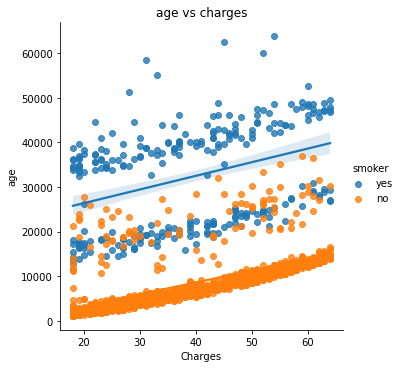

In [21]:
plt.figure(figsize=(10,6))
sns.lmplot(x="age", y="charges", data = df, hue = 'smoker')
plt.xlabel('Charges')
plt.ylabel('age')
plt.title('age vs charges')
plt.show()

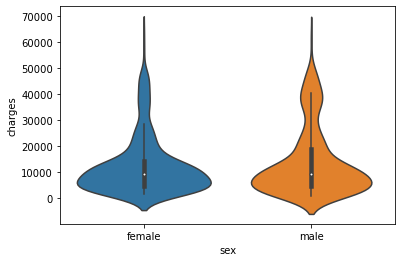

In [22]:
sns.violinplot(x = 'sex', y = 'charges', data = df)
plt.show()

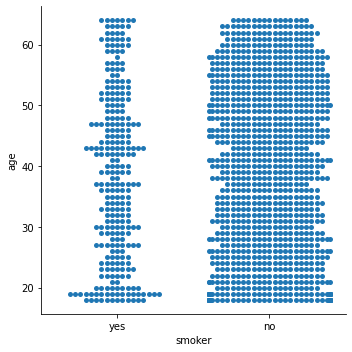

In [23]:
#smokers and age distribution
sns.catplot(x="smoker", y="age", kind="swarm", data=df)
plt.show()

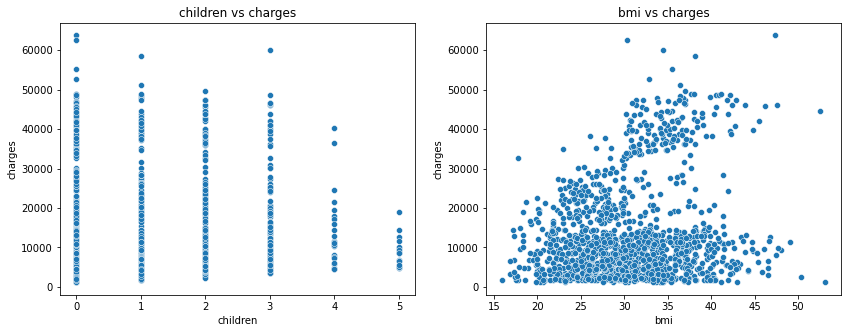

In [24]:
f,ax = plt.subplots(1,2,figsize=(14,5))

sns.scatterplot(x='children',y='charges',data=df,ax=ax[0])
ax[0].set_title('children vs charges')

sns.scatterplot(x='bmi',y='charges',data=df, ax=ax[1])
ax[1].set_title('bmi vs charges')

plt.show()

In [25]:
pd.crosstab(df['smoker'],df['sex'],margins=True).T.style.background_gradient(cmap='summer_r')

smoker,no,yes,All
sex,,,
female,547,115,662
male,517,159,676
All,1064,274,1338


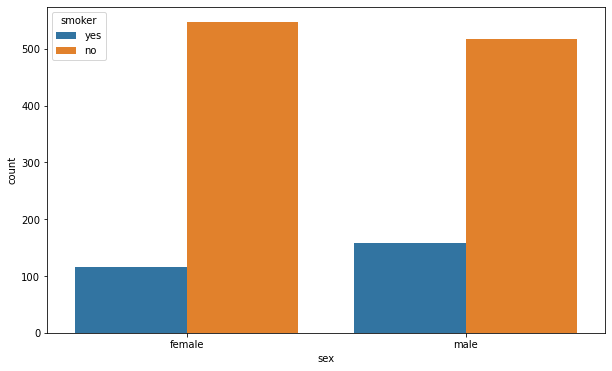

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['sex'], hue=df['smoker'])
plt.show()

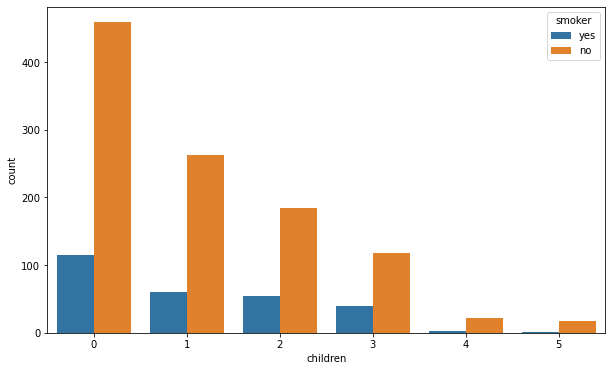

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x = df.children, hue = df.smoker)
plt.show()

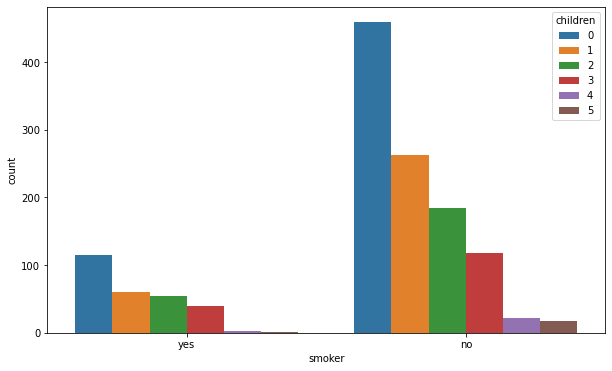

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(hue = df.children, x = df.smoker)
plt.show()

##### Charges distribution for patients with BMI greater than 30 i.e. obese patients

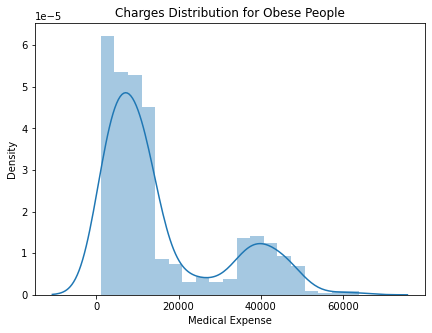

In [29]:
#bmi charges distribution for obese people
plt.figure(figsize=(7,5))
sns.distplot(df[(df.bmi >= 30)]['charges'])
plt.title('Charges Distribution for Obese People')
plt.xlabel('Medical Expense')
plt.show()

##### Charges distribution for patients with BMI less than 30 i.e. healthy patients

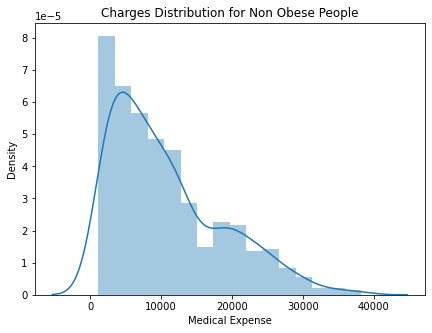

In [30]:
plt.figure(figsize=(7,5))
sns.distplot(df[(df.bmi < 30)]['charges'])
plt.title('Charges Distribution for Non Obese People')
plt.xlabel('Medical Expense')
plt.show()

In [31]:
pd.crosstab(df['smoker'],df['region'], margins=True).style.background_gradient(cmap='summer_r')

region,northeast,northwest,southeast,southwest,All
smoker,,,,,
no,257,267,273,267,1064
yes,67,58,91,58,274
All,324,325,364,325,1338


### 3. Multivariate Analysis

- **Multivariate Analysis** : data involves **multiple different variables**.

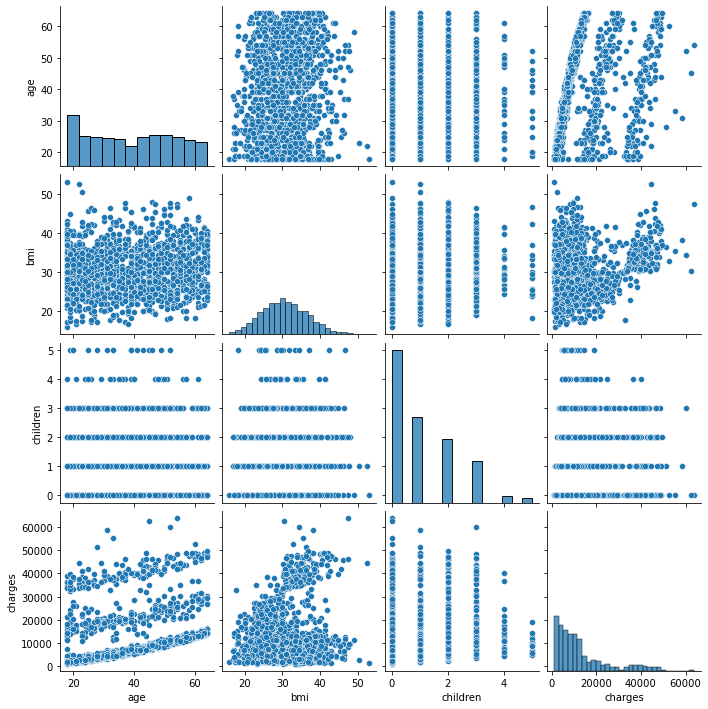

In [32]:
sns.pairplot(df)
plt.show()

<h2 style="color:blue" align="left"> 6. Feature Engineering </h2>

In [33]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
df['age'].max()

64

Age is continous feature, lets try to convert the age feature in ranges by either binning or Normalisation. Here I am using binning by manual method.

(highest age =64)/(ranges = 4) = 16 values

In [35]:
df['age_band'] = 0

In [37]:
df.loc[(df['age'] <= 16),'age_band'] = 0
df.loc[(df['age'] >16)&(df['age'] <=32),'age_band'] = 1
df.loc[(df['age'] >32)&(df['age'] <=48),'age_band'] = 2
df.loc[(df['age'] > 48), 'age_band'] = 3

In [38]:
df['age_band'].value_counts()

1    497
2    428
3    413
Name: age_band, dtype: int64

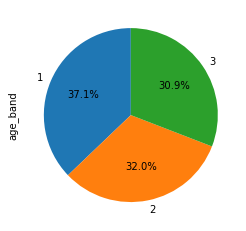

In [39]:
df['age_band'].value_counts().plot.pie(autopct='%4.1f%%',startangle=90)
plt.show()

In [40]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'age_band'],
      dtype='object')

##### Taking the required columns for the prediction

In [41]:
final_dataset=df[['sex', 'bmi', 'children', 'smoker', 'region',
       'age_band','charges']]
final_dataset.head()

,sex,bmi,children,smoker,region,age_band,charges
0,female,27.900,0,yes,southwest,1,16884.92400
1,male,33.770,1,no,southeast,1,1725.55230
2,male,33.000,3,no,southeast,1,4449.46200
3,male,22.705,0,no,northwest,2,21984.47061
4,male,28.880,0,no,northwest,1,3866.85520


##### Applying One Hot Encoding to the dataset to remove categorical variables

In [42]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)
final_dataset.head()

,bmi,children,age_band,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,27.900,0,1,16884.92400,0,1,0,0,1
1,33.770,1,1,1725.55230,1,0,0,1,0
2,33.000,3,1,4449.46200,1,0,0,1,0
3,22.705,0,2,21984.47061,1,0,1,0,0
4,28.880,0,1,3866.85520,1,0,1,0,0


##### Explore the Correlation between numerical features

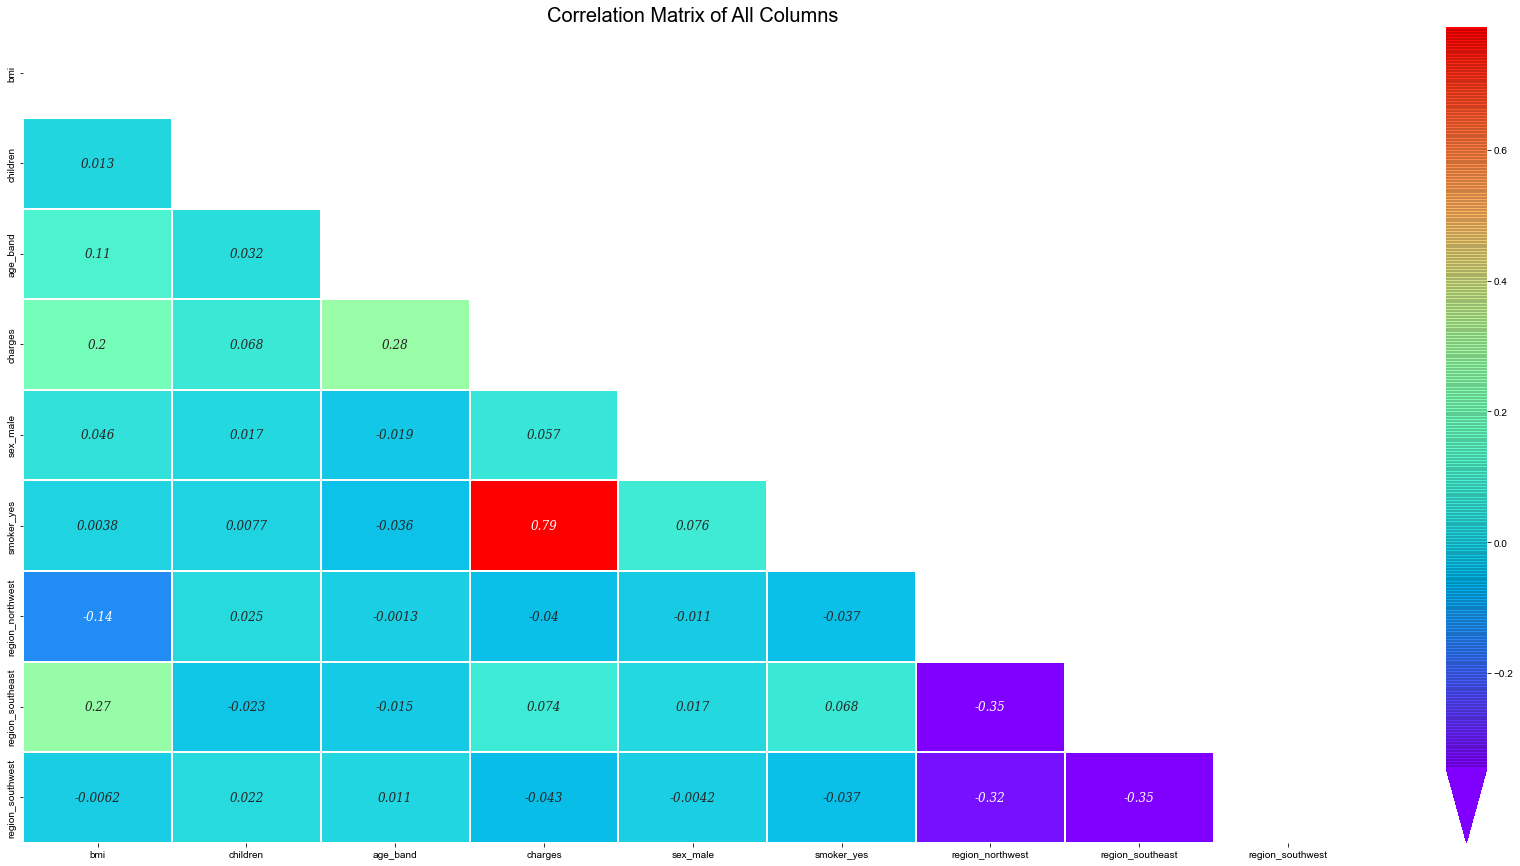

In [43]:
# Define the figure size
plt.figure(figsize = (30,15))

# Cutomize the annot
annot_kws={'fontsize':12,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


# Customize the cbar
cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

# take upper correlation matrix
matrix = np.triu(final_dataset.corr())

# Generate heatmap correlation
ax = sns.heatmap(final_dataset.corr(), mask = matrix, 
                 cmap = 'rainbow', annot = True, linewidth = 1.5,
                 annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Matrix of All Columns', fontsize = 20)

# Set the size of text
sns.set(font_scale = 1.2)

In [44]:
y =final_dataset.pop('charges')
X =final_dataset

In [45]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [46]:
X.head()

,bmi,children,age_band,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,27.900,0,1,0,1,0,0,1
1,33.770,1,1,1,0,0,1,0
2,33.000,3,1,1,0,0,1,0
3,22.705,0,2,1,0,1,0,0
4,28.880,0,1,1,0,1,0,0


In [47]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

#### Splitting dataset into X_train, X_test, y_train, y_test

In [48]:
from sklearn.model_selection import train_test_split #importing train_test_split
#spliting into X_train,X_test,y_train and y_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [49]:
#Training Data
print("X_train", X_train.shape)
print("y_train", y_train.shape)

#Testing Data
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (1070, 8)
y_train (1070,)
X_test (268, 8)
y_test (268,)


In [50]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [51]:
print(model.feature_importances_)

[0.23724219 0.02178563 0.0920536  0.00825998 0.62210462 0.00697422
 0.00697645 0.00460332]


<h2 style="color:blue" align="left"> 7. Building the Model </h2>

##### Importing Linear Regression to train the data

In [52]:
from sklearn import metrics

In [53]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [54]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [55]:
#model training
lr.fit(X_train,y_train)
#model accuracy
lr.score(X_train,y_train)

0.72821250239312

In [56]:
#model prediction
y_pred_lr = lr.predict(X_test)

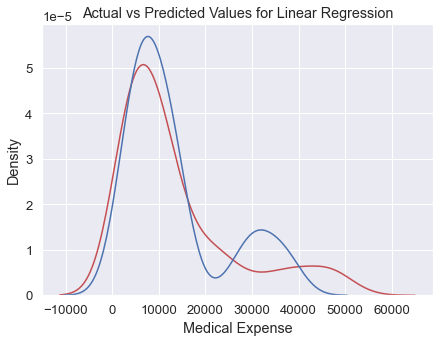

In [57]:
#distribution of actual and predicted values
plt.figure(figsize=(7,5))
ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_pred_lr,hist=False,color='b',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for Linear Regression')
plt.xlabel('Medical Expense')
plt.show()

In [58]:
print('MAE:', mean_absolute_error(y_test, y_pred_lr))
print('MSE:', mean_squared_error(y_test, y_pred_lr))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('R2 Score:', r2_score(y_test, y_pred_lr))

MAE: 3984.836030394752
MSE: 32662548.709705878
RMSE: 5715.115808949621
R2 Score: 0.7947429369486853


##### Polynomial Regression

In [59]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2) 
poly_reg

PolynomialFeatures()

In [60]:
#transforming the features to higher degree
X_train_poly = poly_reg.fit_transform(X_train)
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_train_poly, y_train, test_size=0.2, random_state=0)

In [61]:
plr = LinearRegression()
#model training
plr.fit(X_train,y_train)
#model accuracy
plr.score(X_train,y_train)

0.8128924870313797

In [62]:
#model prediction
y_pred_plr = plr.predict(X_test)

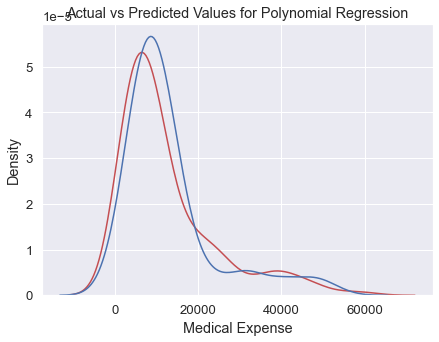

In [63]:
#acutal vs predicted values for polynomial regression
plt.figure(figsize=(7,5))
ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_pred_plr,hist=False,color='b',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for Polynomial Regression')
plt.xlabel('Medical Expense')
plt.show()

In [64]:
print('MAE:', mean_absolute_error(y_test, y_pred_plr))
print('MSE:', mean_squared_error(y_test, y_pred_plr))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_plr)))
print('R2 Score:', r2_score(y_test, y_pred_plr))

MAE: 3684.208081635514
MSE: 30392382.717665974
RMSE: 5512.928687881422
R2 Score: 0.7794887767084275


##### Decision Tree Regressor

In [65]:
#decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree

DecisionTreeRegressor()

In [66]:
#model training
dtree.fit(X_train,y_train)
#model accuracy
dtree.score(X_train,y_train)

0.9982039542987488

In [67]:
#model prediction
y_pred_dtr = dtree.predict(X_test)

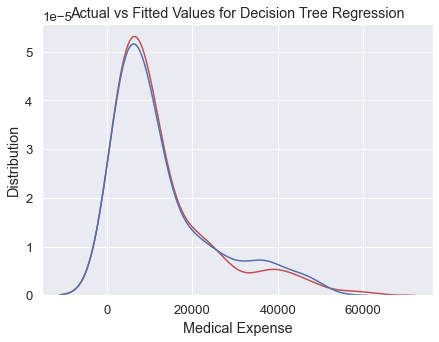

In [68]:
#distribution plot of actual and predicted values
plt.figure(figsize=(7,5))
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_dtr, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Decision Tree Regression')
plt.xlabel('Medical Expense')
plt.ylabel('Distribution')
plt.show()

In [69]:
print('MAE:', mean_absolute_error(y_test, y_pred_dtr))
print('MSE:', mean_squared_error(y_test, y_pred_dtr))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_dtr)))
print('Accuracy:', r2_score(y_test, y_pred_dtr))

MAE: 3979.9591869626165
MSE: 49997133.18127914
RMSE: 7070.865094263865
Accuracy: 0.6372469673966317


##### Random Forest Regressor

In [70]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf

RandomForestRegressor()

In [71]:
#model training
rf.fit(X_train,y_train)
#model accuracy
rf.score(X_train,y_train)

0.9707161921895843

In [72]:
#model prediction
y_pred_rf = rf.predict(X_test)

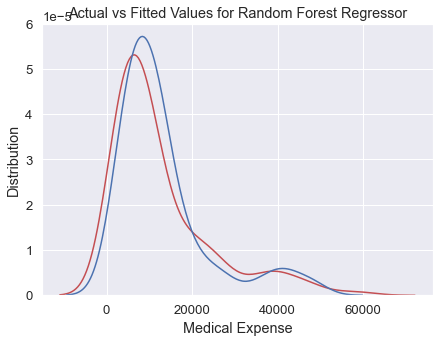

In [73]:
#distribution plot of actual and predicted values
plt.figure(figsize=(7,5))
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_rf, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Random Forest Regressor')
plt.xlabel('Medical Expense')
plt.ylabel('Distribution')
plt.show()

In [74]:
print('MAE:', mean_absolute_error(y_test, y_pred_rf))
print('MSE:', mean_squared_error(y_test, y_pred_rf))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print('Accuracy:', r2_score(y_test, y_pred_rf))

MAE: 3323.6372295292435
MSE: 27603797.665571455
RMSE: 5253.931638836906
Accuracy: 0.7997212904538052


<h2 style="color:blue" align="left"> 8. Conclusion </h2>

From the above models, we can see that Linear Regressor and Random Forest Regressor are giving the best results. But, Random Forest Regressor is giving the best results with the least RMSE value. Therefore, I will use Random Forest Regressor to predict the medical expense of patients.

Moreover, the medical expense of smokers is higher than that of non-smokers. The medical expense of patients with BMI greater than 30 is higher than that of patients with BMI less than 30. The medical expense of older patients is higher than that of younger patients.

Thus, from the overall analysis, we can conclude that the medical expense of patients depends on their age, BMI, smoking habits.